In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def mosaic(img, rect, size):
    # モザイクをかける領域を取得
    (x1, y1, x2, y2) = rect
    w = x2 - x1
    h = y2 - y1
    i_rect = img[y1:y2, x1:x2]
    # モザイク処理のため一度縮小して拡大する
    i_small = cv2.resize(i_rect, ( size, size))
    i_mos = cv2.resize(i_small, (w, h), interpolation=cv2.INTER_AREA)
    # 画像にモザイク画像を重ねる
    img2 = img.copy()
    img2[y1:y2, x1:x2] = i_mos
    return img2

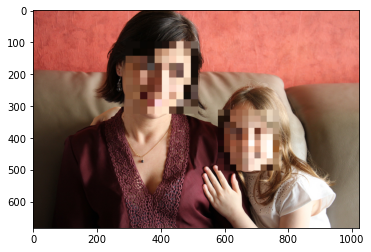

In [3]:
# カスケードファイルを指定して分類機を作成 --- (*1)
cascade_file = "haarcascade_frontalface_alt.xml"
cascade = cv2.CascadeClassifier(cascade_file)

# 画像の読み込んでグレイスケールに変換 --- (*2)
img = cv2.imread("family.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 顔検出を実行 --- (*3)
face_list = cascade.detectMultiScale(img_gray, minSize=(150,150))
if len(face_list) == 0: quit()

# 認識した部分の画像にモザイクをかける --- (*4)
for (x,y,w,h) in face_list:
    img = mosaic(img, (x, y, x+w, y+h), 10)

#画像を出力
cv2.imwrite("family-mosaic.png", img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()